# Image Reading and Matrix Fundamentals

**Goal:** Get comfortable with images as NumPy arrays (matrices): reading, inspecting shapes/dtypes, indexing pixels,
and applying simple matrix operations.

> Notes:
> - OpenCV loads images as **BGR** by default.
> - For plotting with Matplotlib, we convert to **RGB**.

In [ ]:
# Imports
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Matplotlib helper
plt.rcParams['figure.figsize'] = (6, 6)

## 1) Reading Images

Shape (H, W, C): (360, 640, 3)
Dtype: uint8


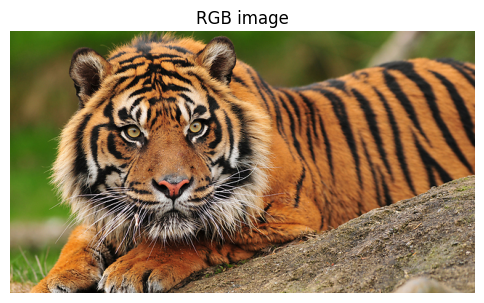

In [ ]:
# Configuration
IMAGE_PATH = 'img.jpg'

# Read image (OpenCV returns BGR)
img_bgr = cv2.imread(IMAGE_PATH)
assert img_bgr is not None, f"Could not read image at: {IMAGE_PATH}"

# Convert to RGB for display
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

print('Shape (H, W, C):', img_rgb.shape)
print('Dtype:', img_rgb.dtype)

plt.imshow(img_rgb)
plt.axis('off')
plt.title('RGB image')
plt.show()

Gray shape (H, W): (360, 640)
Gray dtype: uint8


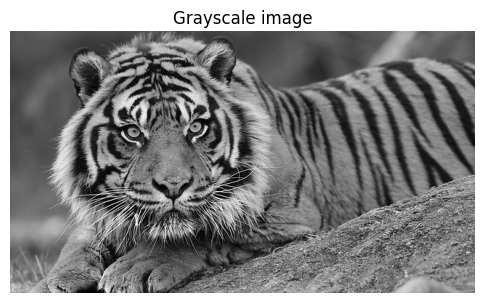

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

print('Gray shape (H, W):', gray.shape)
print('Gray dtype:', gray.dtype)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale image')
plt.show()

## 2) Image as a Matrix

In [ ]:
# A small 5×5 patch from the top-left corner (RGB)
patch = img_rgb[:5, :5, :]
print('Patch shape:', patch.shape)
print(patch)

# Single pixel (top-left)
print('Top-left pixel [R,G,B]:', img_rgb[0, 0])

Patch shape: (5, 5, 3)
[[[ 60 105  14]
  [ 61 104  12]
  [ 63 106  14]
  [ 61 108  14]
  [ 59 109  12]]

 [[ 60 105  14]
  [ 58 108  13]
  [ 57 108  13]
  [ 61 108  12]
  [ 63 107  12]]

 [[ 58 105  13]
  [ 57 106  14]
  [ 59 106  12]
  [ 63 108  15]
  [ 63 108  15]]

 [[ 56 105  13]
  [ 59 106  12]
  [ 61 108  12]
  [ 62 107  14]
  [ 63 106  14]]

 [[ 57 107  12]
  [ 56 107  12]
  [ 58 108  11]
  [ 60 105  10]
  [ 62 107  12]]]
Top-left pixel [R,G,B]: [ 60 105  14]


An RGB image is represented as a 3D array with shape (height, width, 3), where the third dimension corresponds to the color channels.

A grayscale image is represented as a 2D array with shape (height, width), containing a single intensity value per pixel.

For images stored in uint8 format, each pixel value is an integer in the range [0, 255].

## 3) Manual Pixel Manipulation

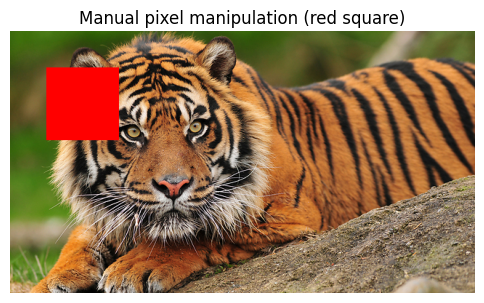

In [ ]:
# Example: draw a red square directly by changing pixel values
# (Note: this is RGB now)
modified = img_rgb.copy()

# Define a square region (y from 50 to 150, x from 50 to 150)
y1, y2 = 50, 150
x1, x2 = 50, 150

# Set the region to red: [255, 0, 0]
modified[y1:y2, x1:x2] = [255, 0, 0]

plt.imshow(modified)
plt.axis('off')
plt.title('Manual pixel manipulation (red square)')
plt.show()

**Explanation:**
Directly changing pixel values means writing new RGB numbers into the image matrix.
For example:
- `[0, 0, 0]` → black
- `[255, 255, 255]` → white
- `[255, 0, 0]` → pure red

## 4) Creating a Matrix Manually

[[255   0   0   0   0   0   0   0   0   0]
 [  0 255   0   0   0   0   0   0   0   0]
 [  0   0 255   0   0   0 180 180 180   0]
 [  0   0   0 255   0   0 180 180 180   0]
 [  0   0   0   0 255   0 180 180 180   0]
 [  0   0   0   0   0 255   0   0   0   0]
 [  0   0   0   0   0   0 255   0   0   0]
 [  0   0   0   0   0   0   0 255   0   0]
 [  0   0   0   0   0   0   0   0 255   0]
 [  0  28  56  85 113 141 170 198 226 255]]


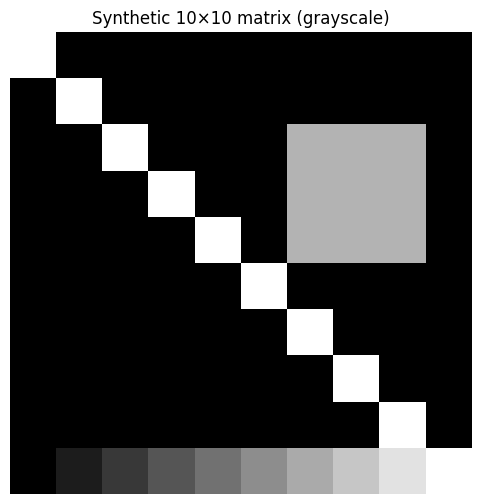

In [ ]:
# Create a simple 10×10 synthetic grayscale image
# 1) diagonal line
synthetic = np.zeros((10, 10), dtype=np.uint8)
np.fill_diagonal(synthetic, 255)

# 2) add a filled square
synthetic[2:5, 6:9] = 180

# 3) add a horizontal gradient in the last row
synthetic[-1, :] = np.linspace(0, 255, 10).astype(np.uint8)

print(synthetic)
plt.imshow(synthetic, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Synthetic 10×10 matrix (grayscale)')
plt.show()


## 5) Matrix Operations on Images

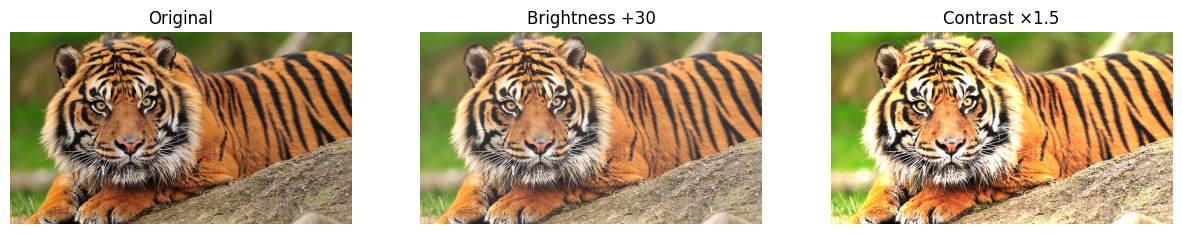

In [ ]:
# Brightness (addition): add a constant to all pixels
# Contrast (multiplication): multiply pixels by a factor

img_float = img_rgb.astype(np.float32)

BRIGHTNESS_DELTA = 30
CONTRAST_FACTOR = 1.5

brighter = np.clip(img_float + BRIGHTNESS_DELTA, 0, 255).astype(np.uint8)
higher_contrast = np.clip(img_float * CONTRAST_FACTOR, 0, 255).astype(np.uint8)

# Show side-by-side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_rgb); axs[0].set_title('Original'); axs[0].axis('off')
axs[1].imshow(brighter); axs[1].set_title(f'Brightness +{BRIGHTNESS_DELTA}'); axs[1].axis('off')
axs[2].imshow(higher_contrast); axs[2].set_title(f'Contrast ×{CONTRAST_FACTOR}'); axs[2].axis('off')
plt.show()


**Key idea:**
- Brightness is typically implemented as **addition**.
- Contrast is typically implemented as **multiplication**.
- We use `np.clip(..., 0, 255)` to keep valid pixel ranges for `uint8` images.
